<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/DT_Classification_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Decision Tree

For this workshop, we will use Iris dataset that is available in sklearn's native dataset.

In [0]:
#First, we load the dataset.

from sklearn import datasets
iris = datasets.load_iris()

In [2]:
#Read dataset description.

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#Predictor column names.

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
#Split the data into train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [0]:
#Import Decision Tree Classifier and fit the model to the training data.
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, Y_train)
#Make predictions and evaluate output.
predictions = tree.predict(X_test)

In [6]:
#Check the top 5 predictions and actual values.

predictions[:5]

array([1, 2, 2, 1, 0])

In [7]:
Y_test[:5]

array([1, 2, 2, 1, 0])

We see that the predictions are pretty accurate. Let's evaluate the prediction accuracy.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test, predictions)
accuracy_score(Y_test, predictions, normalize=False)

28

In [9]:
#Only 2 observations from test set were misclassified. Let's plot confusion matrix for this result.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Setosa','Versicolour','Virginica'],\
                            columns=['Setosa','Versicolour','Virginica'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
confusion_df

,Setosa,Versicolour,Virginica
Setosa,13,0,0
Versicolour,0,6,0
Virginica,0,2,9


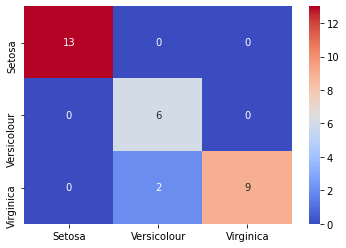

In [11]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

We can also visualize the tree output using graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=iris.feature_names, out_file=None)

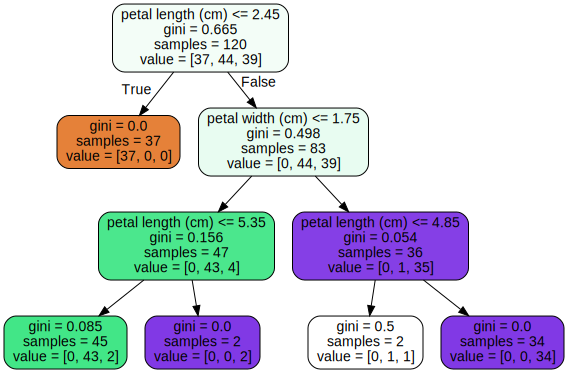

In [13]:
graphviz.Source(dot_data)

In [0]:
#We can also export the graph to other formats like png, pdf etc. by using pydotplus package.

from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
#graph.write_png("Regressor_tree.png")